In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

In [14]:
from keras.layers import Dense, Embedding, Flatten, GlobalMaxPool1D, Conv1D
from keras.models import Sequential

In [6]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [4]:
data = pd.read_csv("preprocessed_data.csv")[["text", "target"]]

In [7]:
tokenizer.fit_on_texts(data["text"])
sequence = tokenizer.texts_to_sequences(data["text"])

In [12]:
sequence = pad_sequences(sequence, maxlen=30, padding="post")

In [17]:
label = data[["target"]]
max_len = 30

one_hot_encoder = OneHotEncoder()
label_nn = one_hot_encoder.fit_transform(label)

In [45]:
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len))
model.add(Conv1D(filters=16, kernel_size=3, activation="relu"))
model.add(Conv1D(filters=8, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [46]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
history = model.fit(sequence, label_nn.todense(), batch_size=8, epochs=8, validation_split=0.2, verbose=2)

Epoch 1/8
762/762 - 2s - loss: 0.6070 - accuracy: 0.6836 - val_loss: 0.5564 - val_accuracy: 0.7695
Epoch 2/8
762/762 - 2s - loss: 0.4237 - accuracy: 0.8452 - val_loss: 0.5114 - val_accuracy: 0.7787
Epoch 3/8
762/762 - 2s - loss: 0.2988 - accuracy: 0.9028 - val_loss: 0.5625 - val_accuracy: 0.7649
Epoch 4/8
762/762 - 2s - loss: 0.2180 - accuracy: 0.9250 - val_loss: 0.5996 - val_accuracy: 0.7400
Epoch 5/8
762/762 - 2s - loss: 0.1685 - accuracy: 0.9430 - val_loss: 0.6574 - val_accuracy: 0.7354
Epoch 6/8
762/762 - 2s - loss: 0.1269 - accuracy: 0.9581 - val_loss: 0.8112 - val_accuracy: 0.7144
Epoch 7/8
762/762 - 2s - loss: 0.1009 - accuracy: 0.9644 - val_loss: 0.8976 - val_accuracy: 0.7006
Epoch 8/8
762/762 - 2s - loss: 0.0813 - accuracy: 0.9698 - val_loss: 0.9911 - val_accuracy: 0.7032


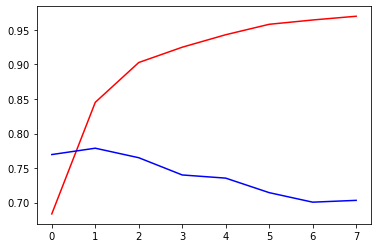

In [48]:
sns.lineplot(x=history.epoch, y=history.history["accuracy"], color="red")
sns.lineplot(x=history.epoch, y=history.history["val_accuracy"], color="blue")